In [23]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

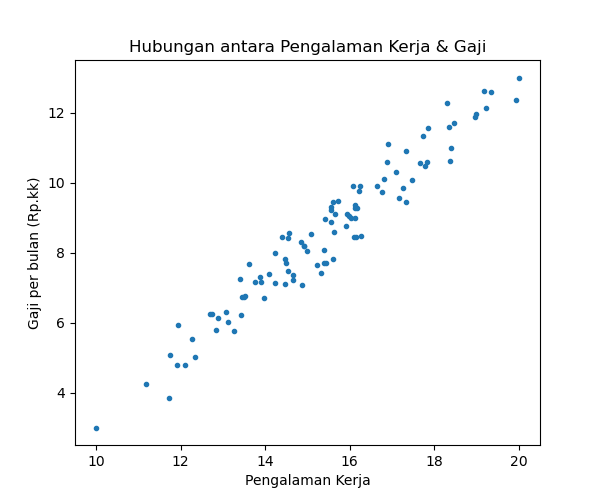

In [31]:
#membuat dataset
x, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)

x = np.interp(x, (x.min(),x.max()), (10,20))
y = np.interp(y, (y.min(),y.max()), (3,13))

fig1 = plt.figure(figsize=(6,5))
plt.plot(x,y, '.')
plt.xlabel('Pengalaman Kerja')
plt.ylabel('Gaji per bulan (Rp.kk)')
plt.title('Hubungan antara Pengalaman Kerja & Gaji')
plt.show()

In [17]:
#split data 70% train data dan 30% test data

trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.3, random_state=0)

In [21]:
if torch.cuda.is_available():
    dev = 'cuda'
else:
    dev = 'cpu'

device = torch.device(dev)
print(f'Komputasi menggunakan {dev}...') 

Komputasi menggunakan cpu...


In [22]:
class linearReg(nn.Module):
    def  __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out
    

In [24]:
input_d = 1
output_d = 1
lr = 1e-4 #learning rate
model = linearReg(input_d, output_d)
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

In [25]:
losses = []
epochs = 100
for epoch in range(epochs):
    epoch += 1

    #convert to torch
    inp = torch.from_numpy(trainX).to(torch.float32)
    lab = torch.from_numpy(trainY).to(torch.float32)

    optimizer.zero_grad()
    pred = model(inp)

    loss = loss_func(pred, lab)
    losses.append(loss.item())

    loss.backward()
    optimizer.step()

    print('Epoch: {} | Loss: {}'.format(epoch, loss.item()))


Epoch: 1 | Loss: 197.2982177734375
Epoch: 2 | Loss: 179.3802032470703
Epoch: 3 | Loss: 163.14051818847656
Epoch: 4 | Loss: 148.42196655273438
Epoch: 5 | Loss: 135.08204650878906
Epoch: 6 | Loss: 122.99163055419922
Epoch: 7 | Loss: 112.03369903564453
Epoch: 8 | Loss: 102.10216522216797
Epoch: 9 | Loss: 93.10089111328125
Epoch: 10 | Loss: 84.94274139404297
Epoch: 11 | Loss: 77.54873657226562
Epoch: 12 | Loss: 70.84730529785156
Epoch: 13 | Loss: 64.7735824584961
Epoch: 14 | Loss: 59.26875686645508
Epoch: 15 | Loss: 54.27956771850586
Epoch: 16 | Loss: 49.7576904296875
Epoch: 17 | Loss: 45.659366607666016
Epoch: 18 | Loss: 41.944915771484375
Epoch: 19 | Loss: 38.57838821411133
Epoch: 20 | Loss: 35.527198791503906
Epoch: 21 | Loss: 32.76179885864258
Epoch: 22 | Loss: 30.25542449951172
Epoch: 23 | Loss: 27.983816146850586
Epoch: 24 | Loss: 25.924983978271484
Epoch: 25 | Loss: 24.058992385864258
Epoch: 26 | Loss: 22.36778450012207
Epoch: 27 | Loss: 20.834985733032227
Epoch: 28 | Loss: 19.44575

/home/izhan/anaconda3/lib/python3.12/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([70])) that is different to the input size (torch.Size([70, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


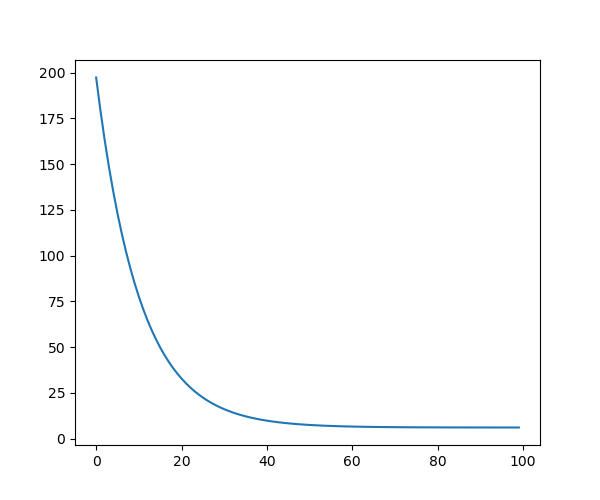

In [30]:
# Visualizing the loss data
fig2 = plt.figure(figsize=(6,5))
plt.plot(range(epochs), losses)
plt.show()

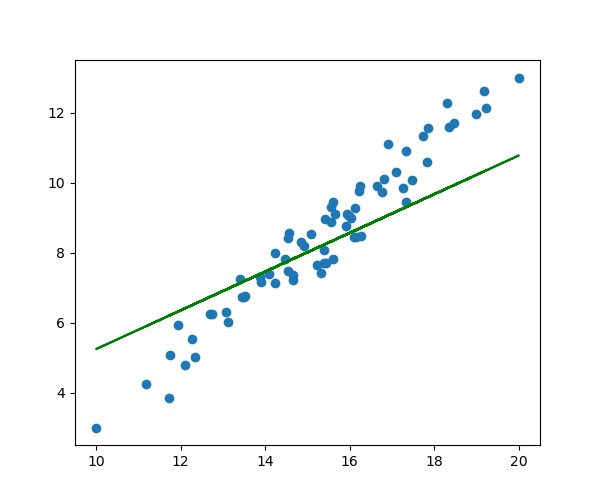

In [29]:
# Visualizing the trained model
def plotModel():
    plt.title('Trained Model')
    plt.xlabel('Years of experience')
    plt.ylabel('Salary per month ($k)')
    
    weight, bias = model.parameters()

    w = weight[0][0].item()
    b = bias[0].item()
    
    X1 = torch.from_numpy(trainX).to(torch.float32)
    Y1 = w * X1 + b
    
    fig3 = plt.figure(figsize=(6,5))
    plt.plot(X1, Y1, 'g')
    plt.scatter(trainX, trainY)
    plt.show()

plotModel()